knn test accuracy: 0.8330, train accuracy: 0.8860
classification report (Test):
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       498
           1       0.83      0.84      0.83       502

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000

(Train)
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      1987
           1       0.89      0.89      0.89      2013

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000



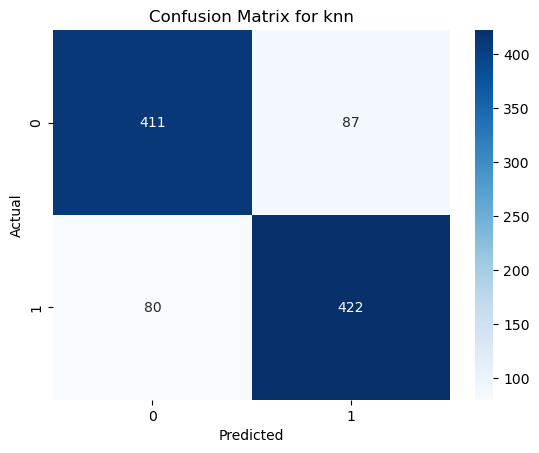

svc test accuracy: 0.8270, train accuracy: 0.8373
classification report (Test):
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       498
           1       0.83      0.82      0.83       502

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000

(Train)
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1987
           1       0.84      0.83      0.84      2013

    accuracy                           0.84      4000
   macro avg       0.84      0.84      0.84      4000
weighted avg       0.84      0.84      0.84      4000



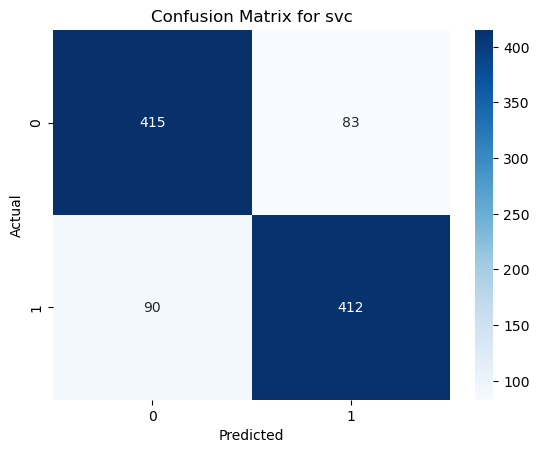

logreg test accuracy: 0.8830, train accuracy: 0.8835
classification report (Test):
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       498
           1       0.88      0.89      0.88       502

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000

(Train)
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      1987
           1       0.88      0.88      0.88      2013

    accuracy                           0.88      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.88      0.88      0.88      4000



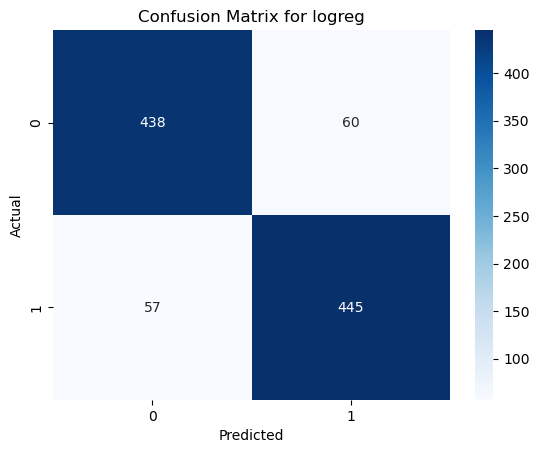

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 분류 모델 파이프라인 생성 후 학습 및 평가
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# './data/netflix_customer_churn_preprocessed.csv' 파일 불러와서 train test split
preprocessed_df = pd.read_csv('../data/netflix_customer_onehot_preprocessed.csv')

X = preprocessed_df.drop(columns=['churned', 'age', 'watch_hours', 'age_scaled'])
y = preprocessed_df['churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 간단한 파이프라인(KNeighborsClassifier, SVC, LogisticRegression, DecisionTreeClassifier) 생성 및 모델 학습
pipelines = {
    'knn': Pipeline([('knn', KNeighborsClassifier())]),
    'svc': Pipeline([('svc', SVC())]),
    'logreg': Pipeline([('logreg', LogisticRegression(max_iter=1000))])
}

for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print(f"{name} test accuracy: {score:.4f}, train accuracy: {pipeline.score(X_train, y_train):.4f}")
    print(f"classification report (Test):\n{classification_report(y_test, pipeline.predict(X_test))}\n(Train)\n {classification_report(y_train, pipeline.predict(X_train))}")


    # Correlation 시각화
    y_pred = pipeline.predict(X_test)
    conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

In [11]:
# age_scaled 확인
# './data/netflix_customer_churn_preprocessed.csv' 파일 불러와서 train test split
preprocessed_df = pd.read_csv('../data/netflix_customer_onehot_preprocessed.csv')

X = preprocessed_df.drop(columns=['churned', 'age', 'watch_hours', 'age_group_0-18','age_group_19-25','age_group_26-35','age_group_36-45','age_group_46-55','age_group_56-65','age_group_65+'])
y = preprocessed_df['churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 간단한 파이프라인(KNeighborsClassifier, SVC, LogisticRegression, DecisionTreeClassifier) 생성 및 모델 학습
pipelines = {
    'knn': Pipeline([('knn', KNeighborsClassifier())]),
    'svc': Pipeline([('svc', SVC())]),
    'logreg': Pipeline([('logreg', LogisticRegression(max_iter=1000))])
}

for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print(f"{name} test accuracy: {score:.4f}, train accuracy: {pipeline.score(X_train, y_train):.4f}")
    print(f"classification report (Test):\n{classification_report(y_test, pipeline.predict(X_test))}\n(Train)\n {classification_report(y_train, pipeline.predict(X_train))}")


    # Correlation 시각화
    y_pred = pipeline.predict(X_test)
    conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

KeyError: "['age_group_0-18', 'age_group_19-25', 'age_group_26-35', 'age_group_36-45', 'age_group_46-55', 'age_group_56-65', 'age_group_65+'] not found in axis"

=== Tree 기반 모델 학습 및 평가 ===

Train 데이터: (4000, 9), Test 데이터: (1000, 9)


모델: Random Forest

학습 시간: 0.31초
Train Accuracy: 1.0000
Test Accuracy: 0.9270
Overfitting 정도: 0.0730

📊 Test Classification Report:
classification report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       498
           1       0.95      0.90      0.93       502

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1987
           1       1.00      1.00      1.00      2013

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



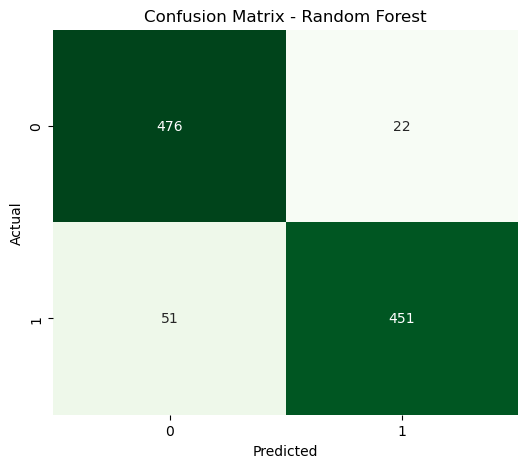


🔍 Feature Importance (Top 10):
                     feature  importance
1                watch_hours    0.441836
2            last_login_days    0.332947
3         number_of_profiles    0.065885
5  subscription_type_encoded    0.048458
0                        age    0.039742
8     favorite_genre_encoded    0.021493
6             region_encoded    0.020072
7             device_encoded    0.017456
4             gender_encoded    0.012111


C:\Users\playdata\AppData\Local\Temp\ipykernel_12776\318897013.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(10), x='importance', y='feature', palette='viridis')


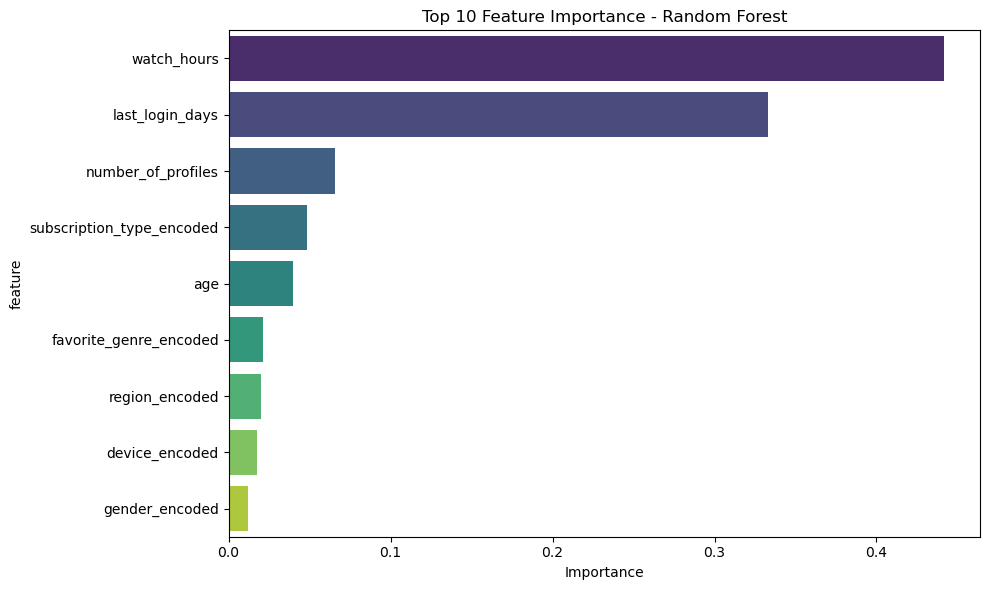


모델: Gradient Boosting

학습 시간: 0.47초
Train Accuracy: 0.9547
Test Accuracy: 0.9370
Overfitting 정도: 0.0177

📊 Test Classification Report:
classification report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       498
           1       0.97      0.90      0.93       502

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000

               precision    recall  f1-score   support

           0       0.93      0.99      0.96      1987
           1       0.99      0.92      0.95      2013

    accuracy                           0.95      4000
   macro avg       0.96      0.95      0.95      4000
weighted avg       0.96      0.95      0.95      4000



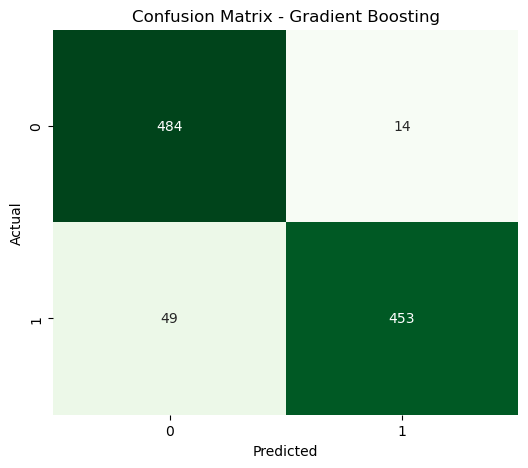


🔍 Feature Importance (Top 10):
                     feature  importance
1                watch_hours    0.501416
2            last_login_days    0.378466
3         number_of_profiles    0.071002
5  subscription_type_encoded    0.047330
0                        age    0.001121
4             gender_encoded    0.000410
8     favorite_genre_encoded    0.000173
7             device_encoded    0.000082
6             region_encoded    0.000000


C:\Users\playdata\AppData\Local\Temp\ipykernel_12776\318897013.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(10), x='importance', y='feature', palette='viridis')


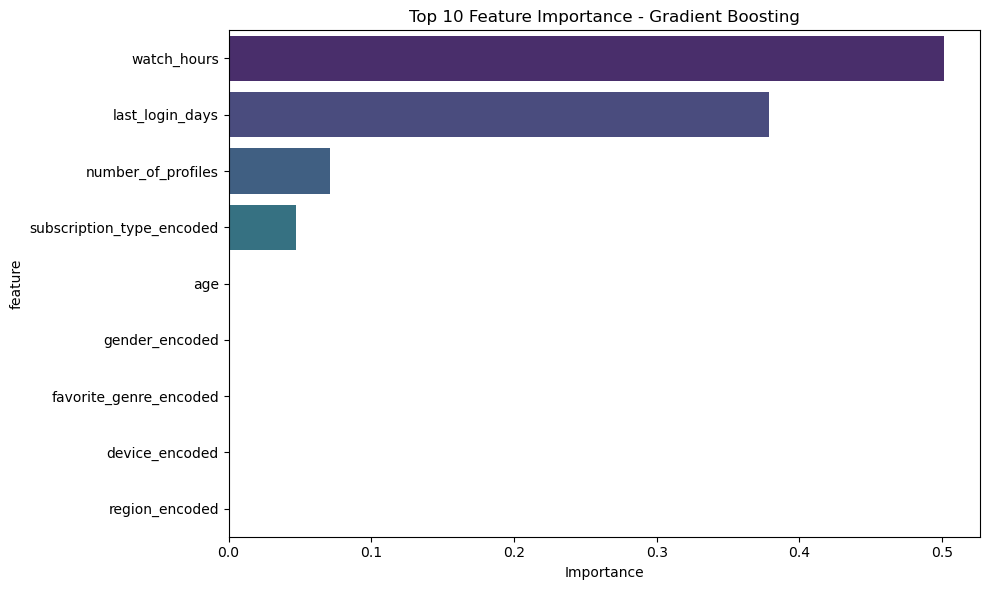


📈 모델 성능 비교 요약
                   train_acc  test_acc  train_time
Random Forest        1.00000     0.927    0.312522
Gradient Boosting    0.95475     0.937    0.466895


In [10]:
# Tree 기반 모델 학습 및 평가
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

print("=== Tree 기반 모델 학습 및 평가 ===\n")

# Tree 전처리 데이터 로드
tree_data = pd.read_csv('../data/netflix_customer_churn_tree_preprocessed.csv')

# X, y 분리
X_tree = tree_data.drop(columns=['churned'])
y_tree = tree_data['churned']

# Train/Test Split
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    X_tree, y_tree, test_size=0.2, random_state=42
)

print(f"Train 데이터: {X_train_tree.shape}, Test 데이터: {X_test_tree.shape}\n")

# Tree 기반 모델들
tree_models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in tree_models.items():
    print(f"\n{'='*50}")
    print(f"모델: {name}")
    print(f"{'='*50}")
    
    # 학습 시간 측정
    start_time = time.time()
    model.fit(X_train_tree, y_train_tree)
    train_time = time.time() - start_time
    
    # 예측
    y_pred_train = model.predict(X_train_tree)
    y_pred_test = model.predict(X_test_tree)
    
    # 정확도 계산
    train_acc = accuracy_score(y_train_tree, y_pred_train)
    test_acc = accuracy_score(y_test_tree, y_pred_test)
    
    print(f"\n학습 시간: {train_time:.2f}초")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Overfitting 정도: {(train_acc - test_acc):.4f}")
    
    # Classification Report
    print(f"\n📊 Test Classification Report:")
    print(f"classification report:\n{classification_report(y_test_tree, model.predict(X_test_tree))}\n {classification_report(y_train_tree, model.predict(X_train_tree))}")
    
    # Confusion Matrix 시각화
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test_tree, y_pred_test)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Feature Importance (RandomForest, GradientBoosting만 지원)
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': X_tree.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print(f"\n🔍 Feature Importance (Top 10):")
        print(feature_importance.head(10))
        
        # Feature Importance 시각화
        plt.figure(figsize=(10, 6))
        sns.barplot(data=feature_importance.head(10), x='importance', y='feature', palette='viridis')
        plt.title(f'Top 10 Feature Importance - {name}')
        plt.xlabel('Importance')
        plt.tight_layout()
        plt.show()
    
    # 결과 저장
    results[name] = {
        'train_acc': train_acc,
        'test_acc': test_acc,
        'train_time': train_time
    }

# 모델 비교 요약
print(f"\n{'='*60}")
print("📈 모델 성능 비교 요약")
print(f"{'='*60}")
comparison_df = pd.DataFrame(results).T
print(comparison_df)

=== Bagging & Voting 앙상블 모델 ===

Train 데이터: (4000, 9), Test 데이터: (1000, 9)

1️⃣ Bagging (Bootstrap Aggregating)
여러 개의 Decision Tree를 독립적으로 학습하여 결합

학습 시간: 4.15초
Train Accuracy: 1.0000
Test Accuracy: 0.9340
Overfitting 정도: 0.0660

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       498
           1       0.96      0.90      0.93       502

    accuracy                           0.93      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.94      0.93      0.93      1000



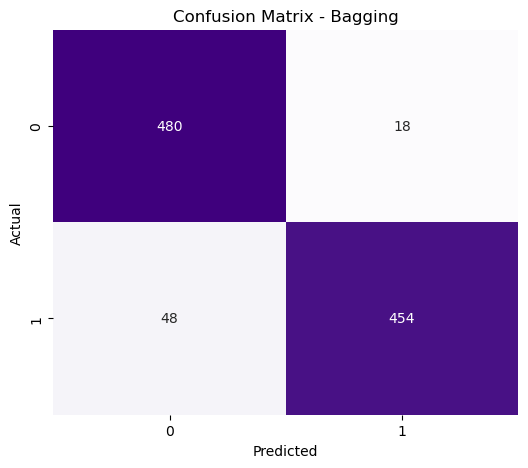


2️⃣ AdaBoost (Adaptive Boosting)
순차적으로 학습하며 이전 모델의 오류에 가중치를 부여



c:\Users\playdata\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


학습 시간: 0.59초
Train Accuracy: 0.9732
Test Accuracy: 0.9320
Overfitting 정도: 0.0412

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       498
           1       0.94      0.92      0.93       502

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



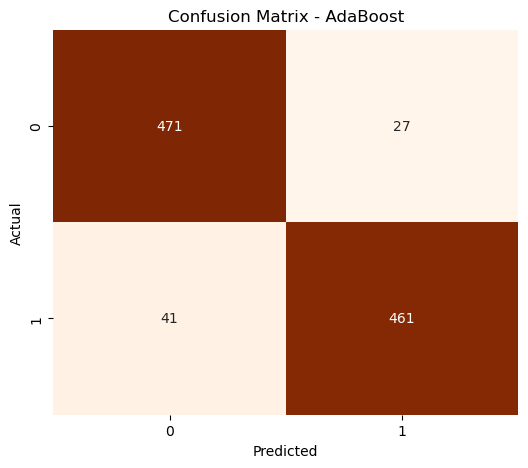


3️⃣ Voting Classifier - Hard Voting
여러 모델의 예측 중 다수결로 최종 예측

학습 시간: 0.45초
Train Accuracy: 1.0000
Test Accuracy: 0.9250
Overfitting 정도: 0.0750

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       498
           1       0.95      0.90      0.92       502

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.92      1000
weighted avg       0.93      0.93      0.92      1000



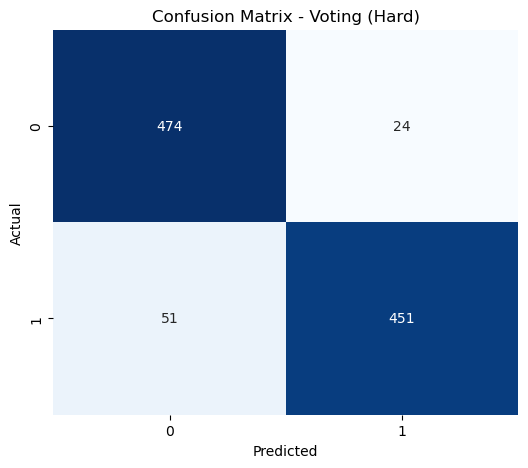


4️⃣ Voting Classifier - Soft Voting
여러 모델의 확률 평균으로 최종 예측 (더 정교함)

학습 시간: 0.42초
Train Accuracy: 0.9752
Test Accuracy: 0.9360
Overfitting 정도: 0.0392

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       498
           1       0.94      0.93      0.94       502

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



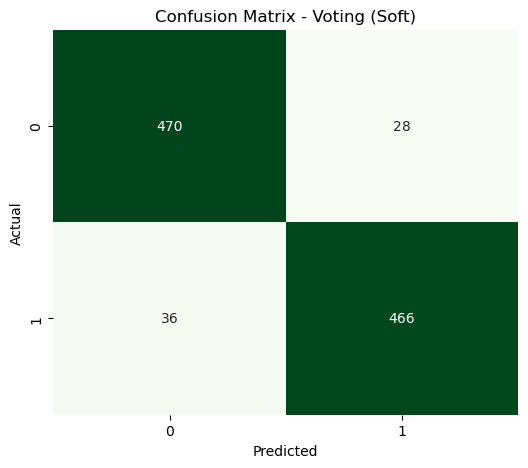


📊 앙상블 모델 성능 비교
        Model  Train Accuracy  Test Accuracy  Overfitting
      Bagging         1.00000          0.934      0.06600
     AdaBoost         0.97325          0.932      0.04125
Voting (Hard)         1.00000          0.925      0.07500
Voting (Soft)         0.97525          0.936      0.03925


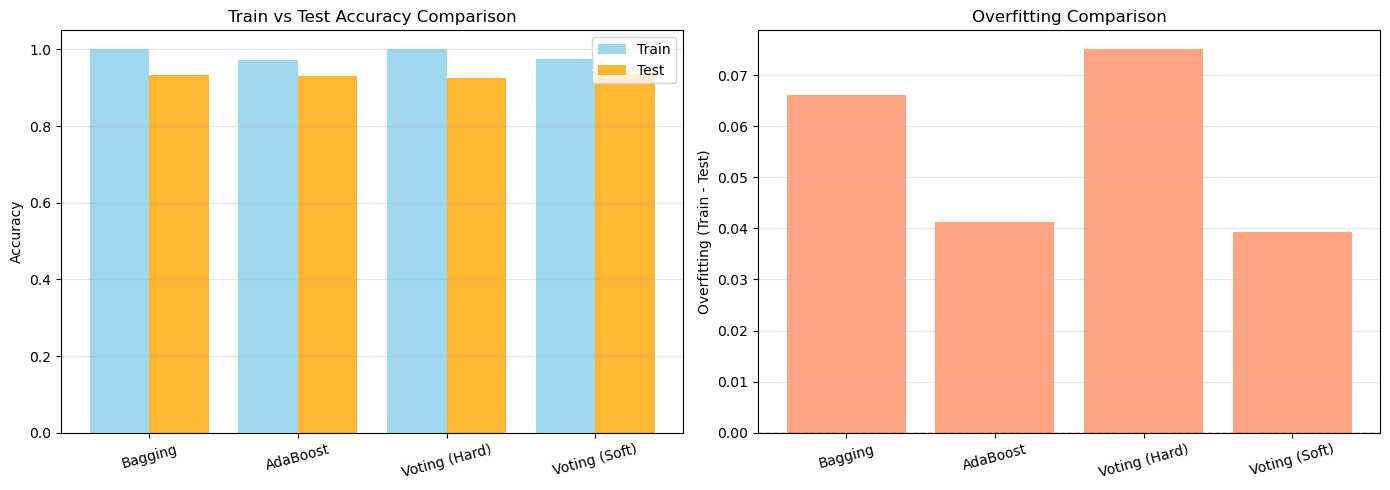


✅ Bagging & Voting 앙상블 모델 학습 완료!


In [11]:
# Bagging과 Voting 앙상블 모델
from sklearn.ensemble import BaggingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

print("=== Bagging & Voting 앙상블 모델 ===\n")

# Tree 전처리 데이터 사용 (이미 로드되어 있음)
tree_data = pd.read_csv('../data/netflix_customer_churn_tree_preprocessed.csv')

X_ensemble = tree_data.drop(columns=['churned'])
y_ensemble = tree_data['churned']

# Train/Test Split
X_train_ens, X_test_ens, y_train_ens, y_test_ens = train_test_split(
    X_ensemble, y_ensemble, test_size=0.2, random_state=42
)

print(f"Train 데이터: {X_train_ens.shape}, Test 데이터: {X_test_ens.shape}\n")

# ========================================
# 1. Bagging (Bootstrap Aggregating)
# ========================================
print(f"{'='*60}")
print("1️⃣ Bagging (Bootstrap Aggregating)")
print(f"{'='*60}")
print("여러 개의 Decision Tree를 독립적으로 학습하여 결합\n")

# Bagging with Decision Tree
bagging_tree = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

start_time = time.time()
bagging_tree.fit(X_train_ens, y_train_ens)
train_time = time.time() - start_time

# 예측 및 평가
y_pred_train = bagging_tree.predict(X_train_ens)
y_pred_test = bagging_tree.predict(X_test_ens)

train_acc = accuracy_score(y_train_ens, y_pred_train)
test_acc = accuracy_score(y_test_ens, y_pred_test)

print(f"학습 시간: {train_time:.2f}초")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Overfitting 정도: {(train_acc - test_acc):.4f}")

print(f"\n📊 Classification Report:")
print(classification_report(y_test_ens, y_pred_test))

# Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test_ens, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix - Bagging')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ========================================
# 2. AdaBoost (Adaptive Boosting)
# ========================================
print(f"\n{'='*60}")
print("2️⃣ AdaBoost (Adaptive Boosting)")
print(f"{'='*60}")
print("순차적으로 학습하며 이전 모델의 오류에 가중치를 부여\n")

adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
    n_estimators=100,
    random_state=42,
    algorithm='SAMME'
)

start_time = time.time()
adaboost.fit(X_train_ens, y_train_ens)
train_time = time.time() - start_time

# 예측 및 평가
y_pred_train = adaboost.predict(X_train_ens)
y_pred_test = adaboost.predict(X_test_ens)

train_acc = accuracy_score(y_train_ens, y_pred_train)
test_acc = accuracy_score(y_test_ens, y_pred_test)

print(f"학습 시간: {train_time:.2f}초")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Overfitting 정도: {(train_acc - test_acc):.4f}")

print(f"\n📊 Classification Report:")
print(classification_report(y_test_ens, y_pred_test))

# Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test_ens, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix - AdaBoost')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ========================================
# 3. Voting Classifier (Hard Voting)
# ========================================
print(f"\n{'='*60}")
print("3️⃣ Voting Classifier - Hard Voting")
print(f"{'='*60}")
print("여러 모델의 예측 중 다수결로 최종 예측\n")

# 다양한 모델 조합
voting_hard = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)),
        ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42))
    ],
    voting='hard'
)

start_time = time.time()
voting_hard.fit(X_train_ens, y_train_ens)
train_time = time.time() - start_time

# 예측 및 평가
y_pred_train = voting_hard.predict(X_train_ens)
y_pred_test = voting_hard.predict(X_test_ens)

train_acc = accuracy_score(y_train_ens, y_pred_train)
test_acc = accuracy_score(y_test_ens, y_pred_test)

print(f"학습 시간: {train_time:.2f}초")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Overfitting 정도: {(train_acc - test_acc):.4f}")

print(f"\n📊 Classification Report:")
print(classification_report(y_test_ens, y_pred_test))

# Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test_ens, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Voting (Hard)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ========================================
# 4. Voting Classifier (Soft Voting)
# ========================================
print(f"\n{'='*60}")
print("4️⃣ Voting Classifier - Soft Voting")
print(f"{'='*60}")
print("여러 모델의 확률 평균으로 최종 예측 (더 정교함)\n")

# Soft Voting (확률 기반)
voting_soft = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)),
        ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
        ('lr', LogisticRegression(max_iter=1000, random_state=42))
    ],
    voting='soft'
)

start_time = time.time()
voting_soft.fit(X_train_ens, y_train_ens)
train_time = time.time() - start_time

# 예측 및 평가
y_pred_train = voting_soft.predict(X_train_ens)
y_pred_test = voting_soft.predict(X_test_ens)

train_acc = accuracy_score(y_train_ens, y_pred_train)
test_acc = accuracy_score(y_test_ens, y_pred_test)

print(f"학습 시간: {train_time:.2f}초")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Overfitting 정도: {(train_acc - test_acc):.4f}")

print(f"\n📊 Classification Report:")
print(classification_report(y_test_ens, y_pred_test))

# Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test_ens, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Voting (Soft)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ========================================
# 5. 앙상블 모델 성능 비교
# ========================================
print(f"\n{'='*60}")
print("📊 앙상블 모델 성능 비교")
print(f"{'='*60}")

ensemble_results = {
    'Bagging': bagging_tree,
    'AdaBoost': adaboost,
    'Voting (Hard)': voting_hard,
    'Voting (Soft)': voting_soft
}

comparison_data = []
for name, model in ensemble_results.items():
    train_score = model.score(X_train_ens, y_train_ens)
    test_score = model.score(X_test_ens, y_test_ens)
    comparison_data.append({
        'Model': name,
        'Train Accuracy': train_score,
        'Test Accuracy': test_score,
        'Overfitting': train_score - test_score
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy 비교
x_pos = np.arange(len(comparison_df))
axes[0].bar(x_pos - 0.2, comparison_df['Train Accuracy'], width=0.4, label='Train', alpha=0.8, color='skyblue')
axes[0].bar(x_pos + 0.2, comparison_df['Test Accuracy'], width=0.4, label='Test', alpha=0.8, color='orange')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(comparison_df['Model'], rotation=15)
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Train vs Test Accuracy Comparison')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Overfitting 비교
axes[1].bar(comparison_df['Model'], comparison_df['Overfitting'], color='coral', alpha=0.7)
axes[1].set_ylabel('Overfitting (Train - Test)')
axes[1].set_title('Overfitting Comparison')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

print("\n✅ Bagging & Voting 앙상블 모델 학습 완료!")

=== RandomForest: One-Hot vs Label Encoding 비교 ===

📊 데이터 1: One-Hot Encoding (preprocessed_df)
   특성 개수: 27
   샘플 개수: 5000
   인코딩 방식: One-Hot Encoding

📊 데이터 2: Label Encoding (tree_data)
   특성 개수: 9
   샘플 개수: 5000
   인코딩 방식: Label Encoding

💡 특성 개수 차이: One-Hot이 Label보다 18개 더 많음

🌲 RandomForest 학습 및 비교

1️⃣ One-Hot Encoding 데이터로 학습
   학습 시간: 0.220초
   Train Accuracy: 1.0000
   Test Accuracy: 0.9260
   Overfitting: 0.0740
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       498
           1       0.94      0.91      0.92       502

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1987
           1       1.00      1.00      1.00      2013

    accuracy                           1.00      4000
   macro avg       1.00      

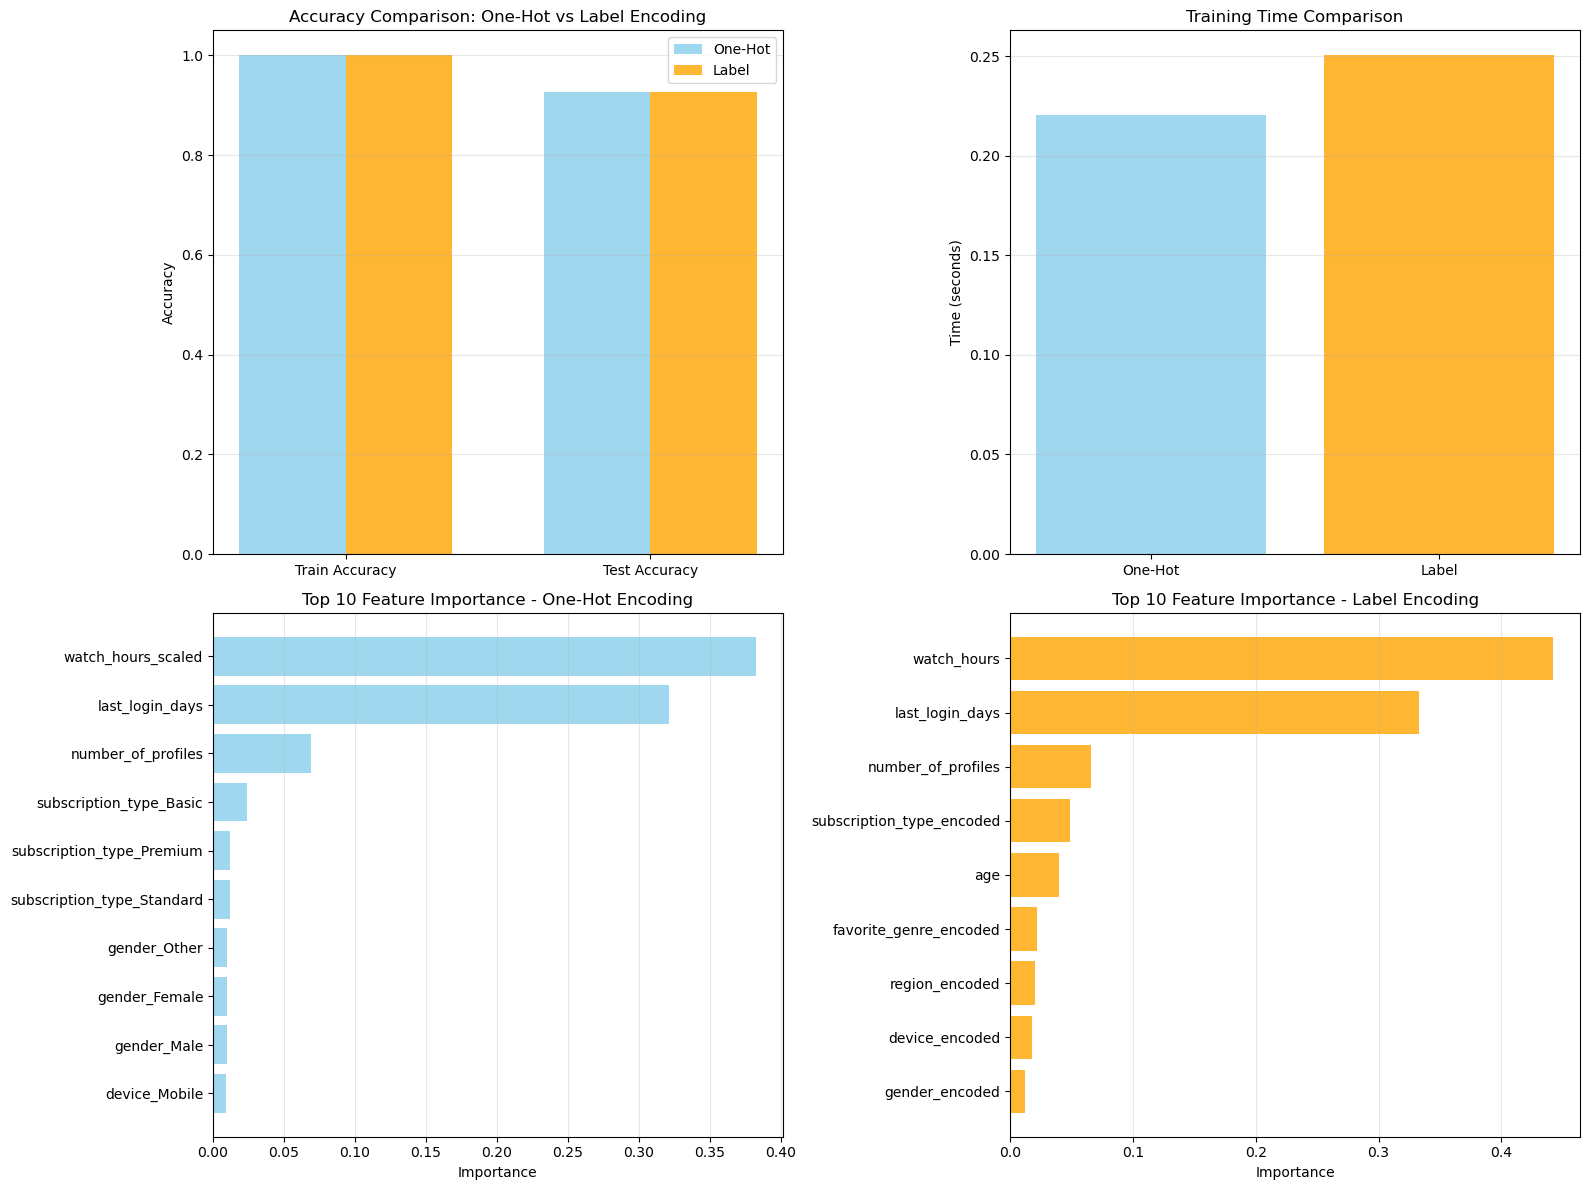

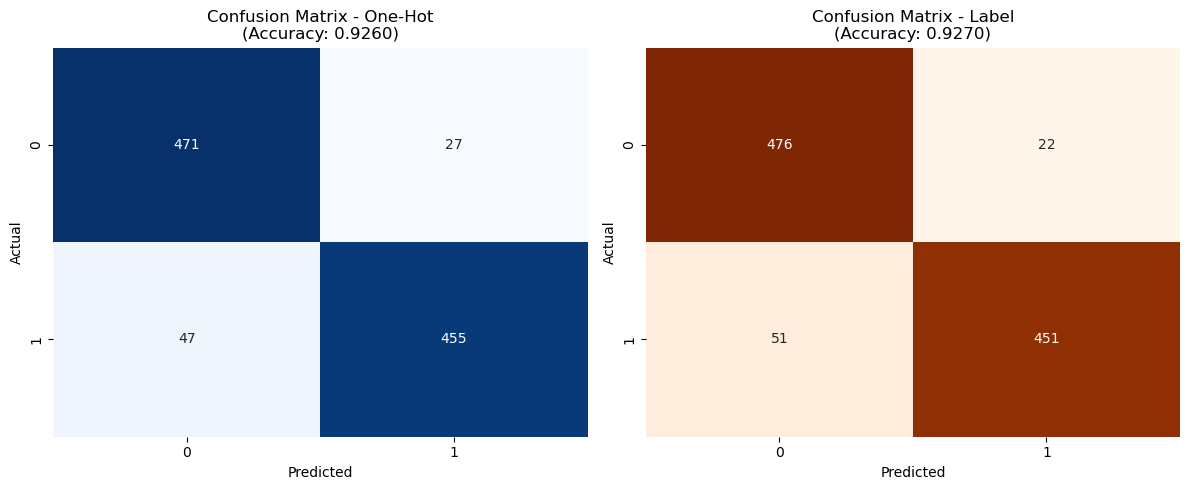


💡 결론 및 권장사항

✅ 성능 차이가 거의 없습니다 (< 1%)

권장사항:
  → 둘 다 사용 가능, 프로젝트 요구사항에 따라 선택

📌 일반적인 가이드라인:
  • One-Hot: 범주 간 순서가 없을 때, 해석 가능성 중요할 때
  • Label: 고차원 데이터, 메모리/속도 중요할 때, Tree 기반 모델

✅ RandomForest 비교 분석 완료!


In [15]:
# RandomForestClassifier: preprocessed_df vs tree_data 비교
print("=== RandomForest: One-Hot vs Label Encoding 비교 ===\n")

# 1. One-Hot Encoding 데이터 (preprocessed_df)
print("📊 데이터 1: One-Hot Encoding (preprocessed_df)")
preprocessed_df = pd.read_csv('../data/netflix_customer_onehot_preprocessed.csv')
X_onehot = preprocessed_df.drop(columns=['churned', 'age', 'watch_hours', 'age_scaled'])
y_onehot = preprocessed_df['churned']

print(f"   특성 개수: {X_onehot.shape[1]}")
print(f"   샘플 개수: {X_onehot.shape[0]}")
print(f"   인코딩 방식: One-Hot Encoding")

# 2. Label Encoding 데이터 (tree_data)
print("\n📊 데이터 2: Label Encoding (tree_data)")
tree_data = pd.read_csv('../data/netflix_customer_churn_tree_preprocessed.csv')
X_label = tree_data.drop(columns=['churned'])
y_label = tree_data['churned']

print(f"   특성 개수: {X_label.shape[1]}")
print(f"   샘플 개수: {X_label.shape[0]}")
print(f"   인코딩 방식: Label Encoding")

print(f"\n💡 특성 개수 차이: One-Hot이 Label보다 {X_onehot.shape[1] - X_label.shape[1]}개 더 많음")

# Train/Test Split (동일한 random_state 사용)
X_train_oh, X_test_oh, y_train_oh, y_test_oh = train_test_split(
    X_onehot, y_onehot, test_size=0.2, random_state=42
)

X_train_lb, X_test_lb, y_train_lb, y_test_lb = train_test_split(
    X_label, y_label, test_size=0.2, random_state=42
)

# RandomForest 모델 생성 (동일한 하이퍼파라미터)
rf_onehot = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_label = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print(f"\n{'='*70}")
print("🌲 RandomForest 학습 및 비교")
print(f"{'='*70}\n")

# ========================================
# One-Hot Encoding 학습
# ========================================
print("1️⃣ One-Hot Encoding 데이터로 학습")
start_time = time.time()
rf_onehot.fit(X_train_oh, y_train_oh)
train_time_oh = time.time() - start_time

y_pred_train_oh = rf_onehot.predict(X_train_oh)
y_pred_test_oh = rf_onehot.predict(X_test_oh)

train_acc_oh = accuracy_score(y_train_oh, y_pred_train_oh)
test_acc_oh = accuracy_score(y_test_oh, y_pred_test_oh)

print(f"   학습 시간: {train_time_oh:.3f}초")
print(f"   Train Accuracy: {train_acc_oh:.4f}")
print(f"   Test Accuracy: {test_acc_oh:.4f}")
print(f"   Overfitting: {(train_acc_oh - test_acc_oh):.4f}")
print(classification_report(y_test_oh, y_pred_test_oh), classification_report(y_train_oh, y_pred_train_oh))

# ========================================
# Label Encoding 학습
# ========================================
print("\n2️⃣ Label Encoding 데이터로 학습")
start_time = time.time()
rf_label.fit(X_train_lb, y_train_lb)
train_time_lb = time.time() - start_time

y_pred_train_lb = rf_label.predict(X_train_lb)
y_pred_test_lb = rf_label.predict(X_test_lb)

train_acc_lb = accuracy_score(y_train_lb, y_pred_train_lb)
test_acc_lb = accuracy_score(y_test_lb, y_pred_test_lb)

print(f"   학습 시간: {train_time_lb:.3f}초")
print(f"   Train Accuracy: {train_acc_lb:.4f}")
print(f"   Test Accuracy: {test_acc_lb:.4f}")
print(f"   Overfitting: {(train_acc_lb - test_acc_lb):.4f}")
print(classification_report(y_test_lb, y_pred_test_lb), classification_report(y_train_lb, y_pred_train_lb))

# ========================================
# 비교 분석
# ========================================
print(f"\n{'='*70}")
print("📈 비교 분석 결과")
print(f"{'='*70}\n")

comparison_results = pd.DataFrame({
    'Metric': ['특성 개수', '학습 시간 (초)', 'Train Accuracy', 'Test Accuracy', 'Overfitting'],
    'One-Hot': [
        X_onehot.shape[1],
        f"{train_time_oh:.3f}",
        f"{train_acc_oh:.4f}",
        f"{test_acc_oh:.4f}",
        f"{(train_acc_oh - test_acc_oh):.4f}"
    ],
    'Label': [
        X_label.shape[1],
        f"{train_time_lb:.3f}",
        f"{train_acc_lb:.4f}",
        f"{test_acc_lb:.4f}",
        f"{(train_acc_lb - test_acc_lb):.4f}"
    ]
})

print(comparison_results.to_string(index=False))

# 승자 판정
print(f"\n🏆 성능 비교:")
if test_acc_oh > test_acc_lb:
    print(f"   ✅ One-Hot Encoding이 {(test_acc_oh - test_acc_lb):.4f} 더 높은 Test Accuracy")
elif test_acc_lb > test_acc_oh:
    print(f"   ✅ Label Encoding이 {(test_acc_lb - test_acc_oh):.4f} 더 높은 Test Accuracy")
else:
    print("   🤝 두 방식의 Test Accuracy가 동일합니다")

print(f"\n⏱️ 학습 속도 비교:")
if train_time_oh < train_time_lb:
    print(f"   ✅ One-Hot Encoding이 {(train_time_lb - train_time_oh):.3f}초 더 빠름")
else:
    print(f"   ✅ Label Encoding이 {(train_time_oh - train_time_lb):.3f}초 더 빠름")

# ========================================
# Classification Report 비교
# ========================================
print(f"\n{'='*70}")
print("📋 Classification Report 비교")
print(f"{'='*70}")

print("\n📊 One-Hot Encoding - Test Classification Report:")
print(classification_report(y_test_oh, y_pred_test_oh, target_names=['Not Churned', 'Churned']))

print("\n📊 Label Encoding - Test Classification Report:")
print(classification_report(y_test_lb, y_pred_test_lb, target_names=['Not Churned', 'Churned']))

# ========================================
# Feature Importance 비교
# ========================================
print(f"\n{'='*70}")
print("🔍 Feature Importance 비교 (Top 10)")
print(f"{'='*70}")

# One-Hot Encoding Feature Importance
feature_imp_oh = pd.DataFrame({
    'feature': X_onehot.columns,
    'importance': rf_onehot.feature_importances_
}).sort_values('importance', ascending=False)

print("\n📊 One-Hot Encoding Top 10:")
print(feature_imp_oh.head(10).to_string(index=False))

# Label Encoding Feature Importance
feature_imp_lb = pd.DataFrame({
    'feature': X_label.columns,
    'importance': rf_label.feature_importances_
}).sort_values('importance', ascending=False)

print("\n📊 Label Encoding Top 10:")
print(feature_imp_lb.head(10).to_string(index=False))

# ========================================
# 시각화
# ========================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Accuracy 비교
categories = ['Train Accuracy', 'Test Accuracy']
onehot_scores = [train_acc_oh, test_acc_oh]
label_scores = [train_acc_lb, test_acc_lb]

x = np.arange(len(categories))
width = 0.35

axes[0, 0].bar(x - width/2, onehot_scores, width, label='One-Hot', alpha=0.8, color='skyblue')
axes[0, 0].bar(x + width/2, label_scores, width, label='Label', alpha=0.8, color='orange')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Accuracy Comparison: One-Hot vs Label Encoding')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(categories)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')

# 2. 학습 시간 비교
axes[0, 1].bar(['One-Hot', 'Label'], [train_time_oh, train_time_lb], 
               color=['skyblue', 'orange'], alpha=0.8)
axes[0, 1].set_ylabel('Time (seconds)')
axes[0, 1].set_title('Training Time Comparison')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Feature Importance - One-Hot (Top 10)
top10_oh = feature_imp_oh.head(10)
axes[1, 0].barh(top10_oh['feature'], top10_oh['importance'], color='skyblue', alpha=0.8)
axes[1, 0].set_xlabel('Importance')
axes[1, 0].set_title('Top 10 Feature Importance - One-Hot Encoding')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, alpha=0.3, axis='x')

# 4. Feature Importance - Label (Top 10)
top10_lb = feature_imp_lb.head(10)
axes[1, 1].barh(top10_lb['feature'], top10_lb['importance'], color='orange', alpha=0.8)
axes[1, 1].set_xlabel('Importance')
axes[1, 1].set_title('Top 10 Feature Importance - Label Encoding')
axes[1, 1].invert_yaxis()
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Confusion Matrix 비교
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# One-Hot Confusion Matrix
cm_oh = confusion_matrix(y_test_oh, y_pred_test_oh)
sns.heatmap(cm_oh, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title(f'Confusion Matrix - One-Hot\n(Accuracy: {test_acc_oh:.4f})')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# Label Confusion Matrix
cm_lb = confusion_matrix(y_test_lb, y_pred_test_lb)
sns.heatmap(cm_lb, annot=True, fmt='d', cmap='Oranges', cbar=False, ax=axes[1])
axes[1].set_title(f'Confusion Matrix - Label\n(Accuracy: {test_acc_lb:.4f})')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# ========================================
# 결론 및 권장사항
# ========================================
print(f"\n{'='*70}")
print("💡 결론 및 권장사항")
print(f"{'='*70}\n")

acc_diff = abs(test_acc_oh - test_acc_lb)
time_diff = abs(train_time_oh - train_time_lb)

if acc_diff < 0.01:
    print("✅ 성능 차이가 거의 없습니다 (< 1%)")
    print("\n권장사항:")
    if train_time_lb < train_time_oh:
        print("  → Label Encoding 사용 권장 (학습 속도가 더 빠르고 메모리 효율적)")
    else:
        print("  → 둘 다 사용 가능, 프로젝트 요구사항에 따라 선택")
else:
    better_method = "One-Hot" if test_acc_oh > test_acc_lb else "Label"
    print(f"✅ {better_method} Encoding이 더 나은 성능을 보입니다")
    print("\n권장사항:")
    print(f"  → {better_method} Encoding 사용 권장")

print("\n📌 일반적인 가이드라인:")
print("  • One-Hot: 범주 간 순서가 없을 때, 해석 가능성 중요할 때")
print("  • Label: 고차원 데이터, 메모리/속도 중요할 때, Tree 기반 모델")

print("\n✅ RandomForest 비교 분석 완료!")

In [ ]:
# cnn 모델 생성 및 학습
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class CNNModel(nn.Module):
    def __init__(self, input_size):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * (input_size // 4), 128)
        self.fc2 = nn.Linear(128, 2)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 32 * (x.size(2)))
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x
# 데이터 준비
# 'numpy.object_' 오류를 해결하기 위해 데이터 타입을 float으로 변환합니다.
X = X.astype(float)
X_tensor = torch.tensor(X.values, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y.values, dtype=torch.long)
dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 모델, 손실 함수, 옵티마이저 정의
input_size = X.shape[1]
model = CNNModel(input_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# 모델 학습
from tqdm import tqdm
epoch = 500
for epoch in range(epoch):
    model.train()
    running_loss = 0.0
    for inputs, labels in tqdm(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if (epoch+1) % 50 == 0:
        print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}')

# cnn 모델 생성 및 학습
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class CNNModel(nn.Module):
    def __init__(self, input_size):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * (input_size // 4), 128)
        self.fc2 = nn.Linear(128, 2)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 32 * (x.size(2)))
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x
# 데이터 준비
# 'numpy.object_' 오류를 해결하기 위해 데이터 타입을 float으로 변환합니다.
X = X.astype(float)
X_tensor = torch.tensor(X.values, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y.values, dtype=torch.long)
dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 모델, 손실 함수, 옵티마이저 정의
input_size = X.shape[1]
model = CNNModel(input_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# 모델 학습
from tqdm import tqdm
epoch = 500
for epoch in range(epoch):
    model.train()
    running_loss = 0.0
    for inputs, labels in tqdm(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if (epoch+1) % 50 == 0:
        print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}')

In [ ]:
# CNN 모델 평가 데이터는 one-hot 인코딩 데이터 사용
model.eval()
correct = 0
total = 0
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

# Classification Report and Confusion Matrix
print("\nClassification Report:")
print(classification_report(all_labels, all_preds))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - CNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Hyper Parameter Tuning for AdaBoost & Soft Voting
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, f1_score
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

# Tree 전처리 데이터 로드
tree_data = pd.read_csv('./data/netflix_customer_churn_tree_preprocessed.csv')

X_tune = tree_data.drop(columns=['churned'])
y_tune = tree_data['churned']

# Train/Test Split
X_train_tune, X_test_tune, y_train_tune, y_test_tune = train_test_split(
    X_tune, y_tune, test_size=0.2, random_state=42
)

# ========================================
# 1. AdaBoost Hyper Parameter Tuning
# ========================================
print("=" * 80)
print("1. AdaBoost Hyper Parameter Tuning")
print("=" * 80)

# AdaBoost 파라미터 그리드
adaboost_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'estimator__max_depth': [1, 2, 3, 4],
    'algorithm': ['SAMME']
}

print("\n탐색할 파라미터:")
print(f"   • n_estimators: {adaboost_param_grid['n_estimators']}")
print(f"   • learning_rate: {adaboost_param_grid['learning_rate']}")
print(f"   • estimator__max_depth: {adaboost_param_grid['estimator__max_depth']}")
print(f"   • algorithm: {adaboost_param_grid['algorithm']}")
print(f"\n   총 조합 개수: {len(adaboost_param_grid['n_estimators']) * len(adaboost_param_grid['learning_rate']) * len(adaboost_param_grid['estimator__max_depth']) * len(adaboost_param_grid['algorithm'])}")

# AdaBoost 기본 모델
adaboost_base = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    random_state=42
)

# GridSearchCV with tqdm
start_time = time.time()

adaboost_grid = GridSearchCV(
    estimator=adaboost_base,
    param_grid=adaboost_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

# tqdm으로 진행률 표시
with tqdm(total=1, desc="AdaBoost GridSearch") as pbar:
    adaboost_grid.fit(X_train_tune, y_train_tune)
    pbar.update(1)

tune_time_ada = time.time() - start_time

print(f"\n Best Parameters:")
for param, value in adaboost_grid.best_params_.items():
    print(f"   • {param}: {value}")

print(f"\n Best Cross-Validation Score: {adaboost_grid.best_score_:.4f}")

# 최적 모델 평가
best_adaboost = adaboost_grid.best_estimator_
y_pred_train_ada = best_adaboost.predict(X_train_tune)
y_pred_test_ada = best_adaboost.predict(X_test_tune)

train_acc_ada = accuracy_score(y_train_tune, y_pred_train_ada)
test_acc_ada = accuracy_score(y_test_tune, y_pred_test_ada)

print(f"\n성능 평가:")
print(f"   Train Accuracy: {train_acc_ada:.4f}")
print(f"   Test Accuracy: {test_acc_ada:.4f}")
print(f"   Overfitting: {(train_acc_ada - test_acc_ada):.4f}")

print(f"\n Test Classification Report:")
print(classification_report(y_test_tune, y_pred_test_ada, target_names=['Not Churned', 'Churned']))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm_ada = confusion_matrix(y_test_tune, y_pred_test_ada)
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title(f'Confusion Matrix - Tuned AdaBoost\n(Test Accuracy: {test_acc_ada:.4f})')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ========================================
# 2. Soft Voting Hyper Parameter Tuning
# ========================================
print("\n" + "=" * 80)
print("2. Soft Voting Hyper Parameter Tuning")
print("=" * 80)

# 각 기본 모델에 대한 개별 튜닝
print("\n 개별 모델 최적화")

# 2-1. Random Forest 튜닝
print("\n Random Forest 튜닝...")
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_grid = GridSearchCV(
    estimator=rf_base,
    param_grid=rf_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

with tqdm(total=1, desc="RF GridSearch") as pbar:
    rf_grid.fit(X_train_tune, y_train_tune)
    pbar.update(1)

best_rf = rf_grid.best_estimator_
print(f"  Best RF params: {rf_grid.best_params_}")
print(f"  CV Score: {rf_grid.best_score_:.4f}")

# 2-2. Gradient Boosting 튜닝
print("\n⚡ Gradient Boosting 튜닝...")
gb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gb_base = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(
    estimator=gb_base,
    param_grid=gb_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

with tqdm(total=1, desc="GB GridSearch") as pbar:
    gb_grid.fit(X_train_tune, y_train_tune)
    pbar.update(1)

best_gb = gb_grid.best_estimator_
print(f"  Best GB params: {gb_grid.best_params_}")
print(f"  CV Score: {gb_grid.best_score_:.4f}")

# 2-3. Logistic Regression 튜닝
print("\n Logistic Regression 튜닝...")
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

lr_base = LogisticRegression(max_iter=1000, random_state=42)
lr_grid = GridSearchCV(
    estimator=lr_base,
    param_grid=lr_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

with tqdm(total=1, desc="LR GridSearch") as pbar:
    lr_grid.fit(X_train_tune, y_train_tune)
    pbar.update(1)

best_lr = lr_grid.best_estimator_
print(f"  Best LR params: {lr_grid.best_params_}")
print(f"  CV Score: {lr_grid.best_score_:.4f}")

# 2-4. 최적화된 모델로 Soft Voting 구성
print("\n Step 2: 최적화된 모델로 Soft Voting 구성")

voting_soft_tuned = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('gb', best_gb),
        ('lr', best_lr)
    ],
    voting='soft'
)

print("\n Soft Voting 학습 중...")
start_time = time.time()

with tqdm(total=1, desc="Soft Voting 학습") as pbar:
    voting_soft_tuned.fit(X_train_tune, y_train_tune)
    pbar.update(1)

train_time_voting = time.time() - start_time

# 예측 및 평가
y_pred_train_voting = voting_soft_tuned.predict(X_train_tune)
y_pred_test_voting = voting_soft_tuned.predict(X_test_tune)

train_acc_voting = accuracy_score(y_train_tune, y_pred_train_voting)
test_acc_voting = accuracy_score(y_test_tune, y_pred_test_voting)

print(f"\n 학습 완료! (소요 시간: {train_time_voting:.2f}초)")
print(f"\n 성능 평가:")
print(f"   Train Accuracy: {train_acc_voting:.4f}")
print(f"   Test Accuracy: {test_acc_voting:.4f}")
print(f"   Overfitting: {(train_acc_voting - test_acc_voting):.4f}")

print(f"\n Test Classification Report:")
print(classification_report(y_test_tune, y_pred_test_voting, target_names=['Not Churned', 'Churned']))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm_voting = confusion_matrix(y_test_tune, y_pred_test_voting)
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title(f'Confusion Matrix - Tuned Soft Voting\n(Test Accuracy: {test_acc_voting:.4f})')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ========================================
# 3. 튜닝 전후 비교
# ========================================
print("\n 튜닝 전후 성능 비교")

# 튜닝 전 모델 (이전 셀에서 학습된 모델 재학습)
print("\n 튜닝 전 모델 학습 (비교용)...")

# 튜닝 전 AdaBoost
adaboost_before = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
    n_estimators=100,
    random_state=42,
    algorithm='SAMME'
)
with tqdm(total=1, desc="AdaBoost (Before)") as pbar:
    adaboost_before.fit(X_train_tune, y_train_tune)
    pbar.update(1)

test_acc_ada_before = accuracy_score(y_test_tune, adaboost_before.predict(X_test_tune))

# 튜닝 전 Soft Voting
voting_before = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)),
        ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
        ('lr', LogisticRegression(max_iter=1000, random_state=42))
    ],
    voting='soft'
)
with tqdm(total=1, desc="Soft Voting (Before)") as pbar:
    voting_before.fit(X_train_tune, y_train_tune)
    pbar.update(1)

test_acc_voting_before = accuracy_score(y_test_tune, voting_before.predict(X_test_tune))

# 비교 테이블
comparison_data = {
    'Model': ['AdaBoost', 'AdaBoost (Tuned)', 'Soft Voting', 'Soft Voting (Tuned)'],
    'Test Accuracy': [
        test_acc_ada_before,
        test_acc_ada,
        test_acc_voting_before,
        test_acc_voting
    ],
    'Improvement': [
        '-',
        f'+{(test_acc_ada - test_acc_ada_before):.4f}',
        '-',
        f'+{(test_acc_voting - test_acc_voting_before):.4f}'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + comparison_df.to_string(index=False))

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# AdaBoost 비교
ada_models = ['Before\nTuning', 'After\nTuning']
ada_scores = [test_acc_ada_before, test_acc_ada]
bars1 = axes[0].bar(ada_models, ada_scores, color=['coral', 'orange'], alpha=0.8, width=0.6)
axes[0].set_ylabel('Test Accuracy')
axes[0].set_title('AdaBoost: Before vs After Tuning')
axes[0].set_ylim([min(ada_scores) - 0.02, max(ada_scores) + 0.02])
axes[0].grid(True, alpha=0.3, axis='y')

# 값 표시
for bar, score in zip(bars1, ada_scores):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{score:.4f}',
                ha='center', va='bottom', fontweight='bold')

# 개선도 표시
improvement_ada = test_acc_ada - test_acc_ada_before
axes[0].annotate(f'+{improvement_ada:.4f}', 
                xy=(0.5, max(ada_scores)), 
                xytext=(0.5, max(ada_scores) + 0.01),
                ha='center', fontsize=12, color='green', fontweight='bold',
                arrowprops=dict(arrowstyle='->', color='green', lw=2))

# Soft Voting 비교
voting_models = ['Before\nTuning', 'After\nTuning']
voting_scores = [test_acc_voting_before, test_acc_voting]
bars2 = axes[1].bar(voting_models, voting_scores, color=['lightgreen', 'green'], alpha=0.8, width=0.6)
axes[1].set_ylabel('Test Accuracy')
axes[1].set_title('Soft Voting: Before vs After Tuning')
axes[1].set_ylim([min(voting_scores) - 0.02, max(voting_scores) + 0.02])
axes[1].grid(True, alpha=0.3, axis='y')

# 값 표시
for bar, score in zip(bars2, voting_scores):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{score:.4f}',
                ha='center', va='bottom', fontweight='bold')

# 개선도 표시
improvement_voting = test_acc_voting - test_acc_voting_before
axes[1].annotate(f'+{improvement_voting:.4f}', 
                xy=(0.5, max(voting_scores)), 
                xytext=(0.5, max(voting_scores) + 0.01),
                ha='center', fontsize=12, color='green', fontweight='bold',
                arrowprops=dict(arrowstyle='->', color='green', lw=2))

plt.tight_layout()
plt.show()

print("\n✅ Hyper Parameter Tuning 완료!")